In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
visa_df=pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [3]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Prevailing wage**

- len
- max
- min
- median
- std
- 75%
- 50%
- 25%

In [4]:
len(visa_df['prevailing_wage'])

25480

In [5]:
max(visa_df['prevailing_wage'])

319210.27

In [6]:
min(visa_df['prevailing_wage'])

2.1367

In [7]:
np.min(visa_df['prevailing_wage'])

2.1367

In [8]:
visa_df['prevailing_wage'].min()

2.1367

**Mean**

In [9]:
visa_df['prevailing_wage'].mean()

74455.81459209183

In [10]:
visa_df['prevailing_wage'].median()

70308.20999999999

**Mode is not a good option because it is a numerical variable**

In [11]:
visa_df['prevailing_wage'].mode()

0        100.66
1        102.70
2        105.96
3        108.12
4        109.06
5        110.51
6        111.11
7        113.60
8        118.43
9        122.65
10       127.89
11       134.15
12       138.76
13      6036.67
14     21894.51
15     24258.73
16     58770.05
17     60948.15
18     64357.58
19     74645.92
20     82560.28
21     87751.88
22     88664.77
23     93356.03
24    126813.75
25    149907.39
Name: prevailing_wage, dtype: float64

In [12]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [13]:
np.std(visa_df['prevailing_wage'])

52814.90589711402

In [6]:
##All together#
Wage_count=round(len(visa_df['prevailing_wage']),2)
Wage_min=round(visa_df['prevailing_wage'].min(),2)
Wage_max=round(visa_df['prevailing_wage'].max(),2)
Wage_mean=round(visa_df['prevailing_wage'].mean(),2)
Wage_median=round(visa_df['prevailing_wage'].median(),2)
Wage_std=round(visa_df['prevailing_wage'].std(),2)
W25p=np.percentile(visa_df['prevailing_wage'],25)
W50p=np.percentile(visa_df['prevailing_wage'],50)
W75p=np.percentile(visa_df['prevailing_wage'],75)
data=[Wage_count,Wage_min,Wage_max,Wage_mean,Wage_median,Wage_std,W25p,W50p,W75p]
index=['Count','Min','Max','Mean','Median','Std','25%','50%','75%']
pd.DataFrame(data,index,columns=['Prevailing Wage'])


,Prevailing Wage
Count,25480.0000
Min,2.1400
Max,319210.2700
Mean,74455.8100
Median,70308.2100
Std,52815.9400
25%,34015.4800
50%,70308.2100
75%,107735.5125


**Percentile and Quantile**
- Percentile:
  - np.Precentile()
  - It will take 2 parameters
    - Data
    - Percentile: q the values varies from 0 to 100
    - if want 50P data q=50
- Quantile:
  - np.Quantile()
  - It will take 2 arguments
    - Data
    - Percentile: q the values varies from 0 to 1
    - if want 50P data q=0.5

**25p-50p-75p**

In [29]:
wage_25p=np.percentile(visa_df['prevailing_wage'],25)
wage_50p=np.percentile(visa_df['prevailing_wage'],50)
wage_75p=np.percentile(visa_df['prevailing_wage'],75)
print(f"The 25% data is {round(wage_25p,2)}")
print(f"The 50% data is {round(wage_50p,2)}")
print(f"The 75% data is {round(wage_75p,2)}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


In [31]:
wage_25p=np.quantile(visa_df['prevailing_wage'],0.25)
wage_50p=np.quantile(visa_df['prevailing_wage'],0.5)
wage_75p=np.quantile(visa_df['prevailing_wage'],0.75)
print(f"The 25% data is {round(wage_25p,2)}")
print(f"The 50% data is {round(wage_50p,2)}")
print(f"The 75% data is {round(wage_75p,2)}")

The 25% data is 34015.48
The 50% data is 70308.21
The 75% data is 107735.51


**Understanding Percentiles**
- Definition of 25 percentile
- There are 25% of employess has salary less than 34015
- Total employees = 25480
- 25% of employees = 6370
- 6370 employees salary less than 34015

In [35]:
con=visa_df['prevailing_wage']<34015
len(visa_df[con])

6370

In [36]:
fifty=visa_df['prevailing_wage']<70308
len(visa_df[fifty])

12740

In [37]:
Seven_five=visa_df['prevailing_wage']<107735.51
len(visa_df[Seven_five])

19110

**Empirical Rule (68-95-99.7)**

In [40]:
V1=Wage_mean-Wage_std
V2=Wage_mean+Wage_std
V1,V2

(21639.869999999995, 127271.75)

In [48]:
Con1=visa_df['prevailing_wage']>V1
Con2=visa_df['prevailing_wage']<V2 
Count68=len(visa_df[Con1 & Con2])
Count68

17171

In [46]:
Val1=Wage_mean-(2*Wage_std)
Val2=Wage_mean+(2*Wage_std)
Val1,Val2

(-31176.070000000007, 180087.69)

In [47]:
Cond1=visa_df['prevailing_wage']>Val1
Cond2=visa_df['prevailing_wage']<Val2 
Count95=len(visa_df[Cond1 & Cond2])
Count95

24582

In [49]:
Value1=Wage_mean-(3*Wage_std)
Value2=Wage_mean+(3*Wage_std)
Condi1=visa_df['prevailing_wage']>Value1
Condi2=visa_df['prevailing_wage']<Value2 
Count99=len(visa_df[Condi1 & Condi2])
Count99

25186

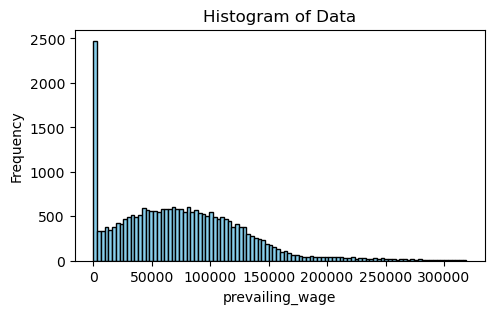

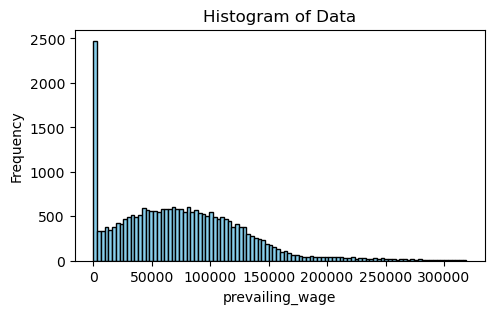

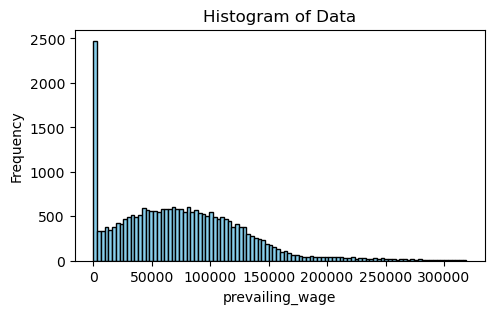

In [31]:
for i in range
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'], bins=100,color='skyblue', edgecolor='black')
plt.xlabel('prevailing_wage')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()
#######################
plt.figure(figsize=(18,3))
plt.subplot(1,3,2)
plt.hist(visa_df['prevailing_wage'], bins=100,color='skyblue', edgecolor='black')
plt.xlabel('prevailing_wage')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()
########################
plt.figure(figsize=(18,3))
plt.subplot(1,3,3)
plt.hist(visa_df['prevailing_wage'], bins=100,color='skyblue', edgecolor='black')
plt.xlabel('prevailing_wage')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

From interval range
- 2.13670000e+00 to 3.19229500e+04
- 6038 members have salary

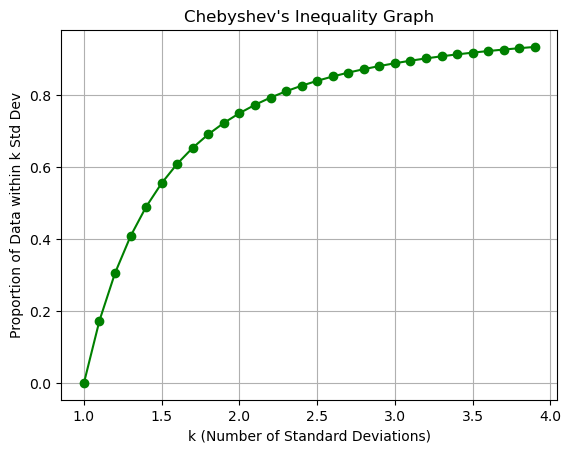

In [54]:
mean = visa_df['prevailing_wage'].mean()
std_dev = visa_df['prevailing_wage'].std()

k_values = np.arange(1, 4, 0.1)
chebyshev_inequality = 1 - 1 / (k_values ** 2)

plt.plot(k_values, chebyshev_inequality, marker='o', color='green')
plt.xlabel('k (Number of Standard Deviations)')
plt.ylabel('Proportion of Data within k Std Dev')
plt.title("Chebyshev's Inequality Graph")
plt.grid(True)
plt.show()

In [7]:
visa_df['no_of_employees']

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [15]:
columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']  # Replace with actual column names
stats_data=[]
# Compute statistics for each column
for col in columns:
    count = len(visa_df[col])
    min_val = round(visa_df[col].min(), 2)
    max_val = round(visa_df[col].max(), 2)
    mean_val = round(visa_df[col].mean(), 2)
    median_val = round(visa_df[col].median(), 2)
    std_val = round(visa_df[col].std(), 2)
    _25p_val = round(np.percentile(visa_df[col], 25), 2)
    _50p_val = round(np.percentile(visa_df[col], 50), 2)  # Equivalent to median
    _75p_val = round(np.percentile(visa_df[col], 75), 2)
    
    stats_data.append([count, min_val, max_val, mean_val, median_val, std_val, _25p_val, _50p_val, _75p_val])

# Index for the statistics
index = ['Count', 'Min', 'Max', 'Mean', 'Median', 'Std', '25%', '50%', '75%']

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame(stats_data, columns=index, index=columns).T

print(stats_df)

        no_of_employees  yr_of_estab  prevailing_wage
Count          25480.00     25480.00         25480.00
Min              -26.00      1800.00             2.14
Max           602069.00      2016.00        319210.27
Mean            5667.04      1979.41         74455.81
Median          2109.00      1997.00         70308.21
Std            22877.93        42.37         52815.94
25%             1022.00      1976.00         34015.48
50%             2109.00      1997.00         70308.21
75%             3504.00      2005.00        107735.51


In [17]:
round(visa_df.describe(),2)

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
mean,5667.04,1979.41,74455.81
std,22877.93,42.37,52815.94
min,-26.00,1800.00,2.14
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51
max,602069.00,2016.00,319210.27


**Histogram**
- Histogram can be done by matplotlib
- Histogram can be done by seaborn

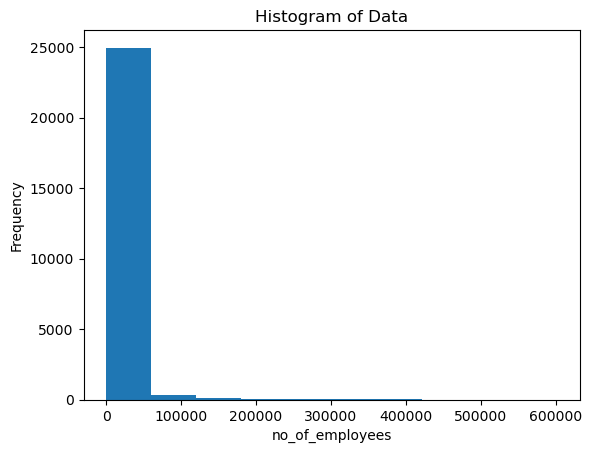

In [22]:
plt.hist(visa_df['no_of_employees'])
plt.xlabel('no_of_employees')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

from interval range
2.13670000e+00 to 3.19229500e+04
6038 members have salary between above range
3.19229500e+04 to 6.38437634e+04
5504 members have salary
Histogram will give 3 outputs
frequency
in each interval range how many observations are there
interval
interval range
number of intervals

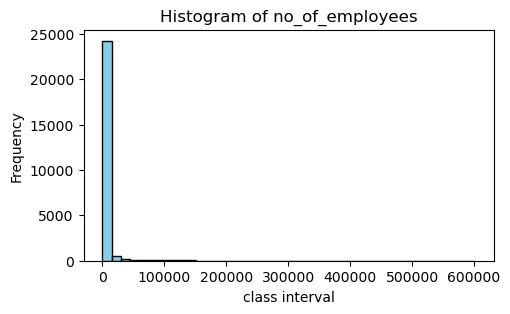

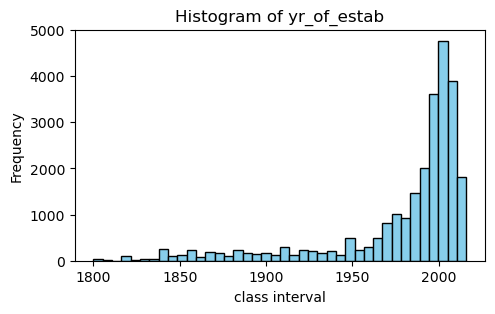

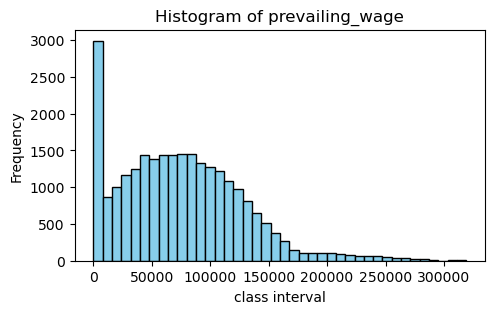

In [36]:
for i in range(len(columns)):
    plt.figure(figsize=(18,3))
    plt.subplot(1,len(columns),i+1)
    plt.hist(visa_df[columns[i]], bins=40,color='skyblue', edgecolor='black')
    plt.xlabel(f'class interval')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {columns[i]}')
    plt.show()


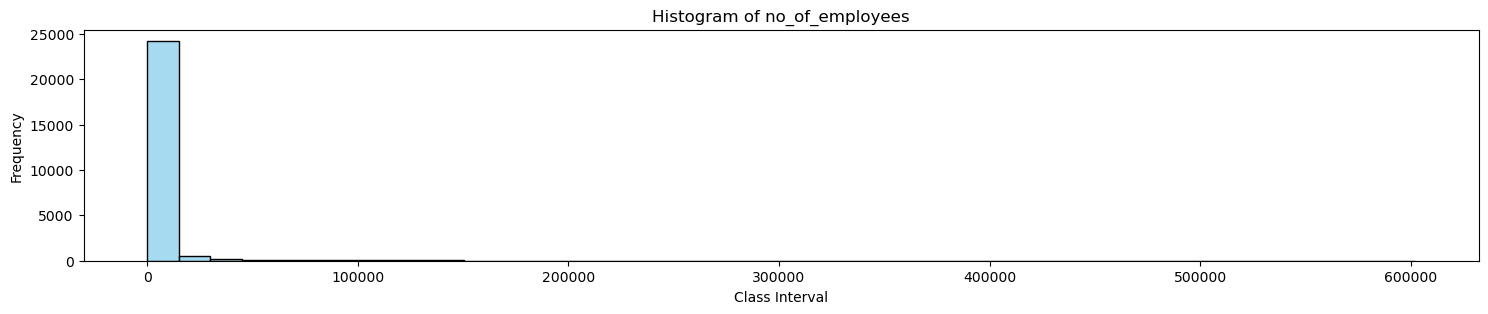

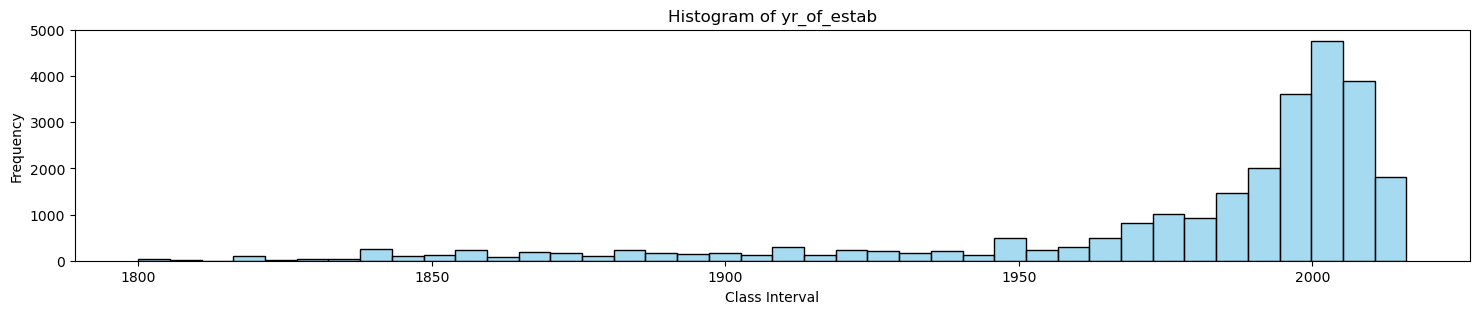

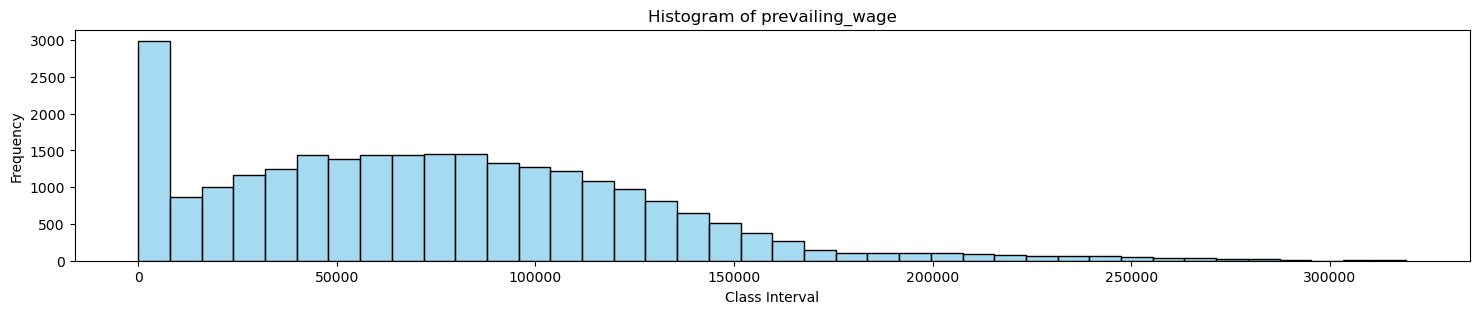

In [46]:
import warnings
warnings.filterwarnings("ignore")
for i, column in enumerate(columns):
    plt.figure(figsize=(18, 3))
    sns.histplot(data=visa_df, x=visa_df[column], bins=40, kde=False, color='skyblue', edgecolor='black')  # Access column from DataFrame
    plt.xlabel(f'Class Interval')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

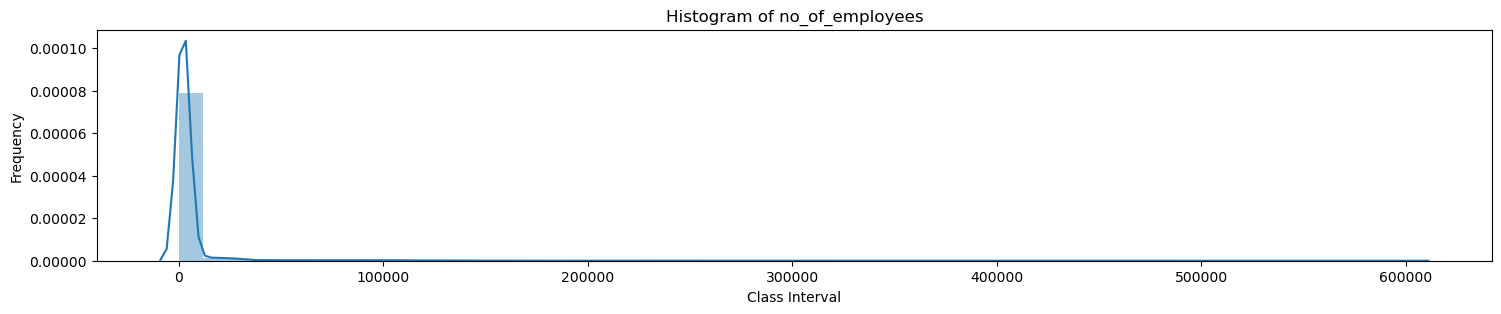

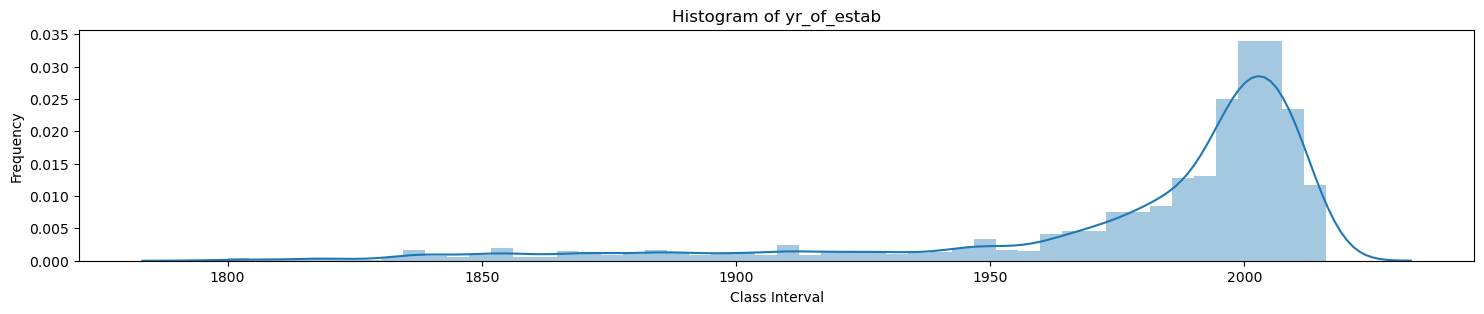

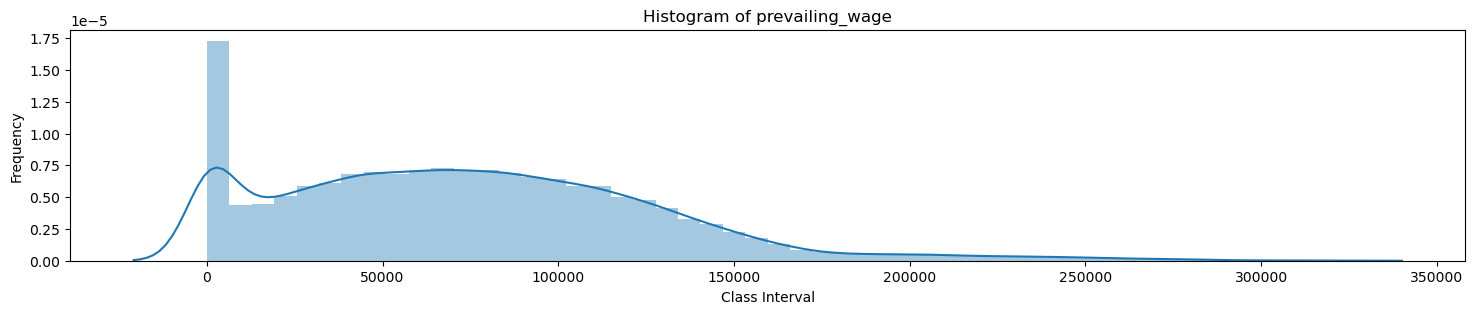

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'visa_df' is your DataFrame and 'columns' is a list of column names

for i, column in enumerate(columns):
    plt.figure(figsize=(18, 3))
    sns.distplot(visa_df[column])  # Remove edgecolor
    plt.xlabel(f'Class Interval')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()